In [21]:
# experimental: you can run this cell to see your code full-width

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
# list of library for this project
import requests
import pprint as pp
import datetime
from datetime import date 
from datetime import datetime
import matplotlib.pyplot as plt
import math
import pandas as pd
# you might need to add a few of your own

In [304]:
# function for calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key = "788599db-f611-4116-a9b7-db9318c6715a"
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    # above: could be eg. https://api.companieshouse.gov.uk/search/companies?q=shop&items_per_page=1
    #print(f'requesting: {url}') 
    # above, optional: printing, so that you see visually how many calls you are making
    res = requests.get(url, headers=login_headers) #, verify=False)
    return res.json()

# test to get one company
def get_one_test_company_or_error():
    url = f"search/companies?q=shop&items_per_page=1"
    return call_api_with(url)

# search company with specific query / keyword
def search_for_companies_with_query(query, optionalNumber_of_companies = 100, page = 0):
    url = f"search/companies?q={query}&items_per_page={optionalNumber_of_companies}&start_index={page * optionalNumber_of_companies}"
    return call_api_with(url).get('items', [])

# request to get company data based on company number
def data_for_company(company_number):
    url = f"company/{company_number}"
    return call_api_with(url)

# get all persons with significant control from company which contains specific keyword
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

def detailed_info_about_companies_with_ids(companies_numbers):
    results = []
    for company_number in companies_numbers:
        results.append(data_for_company(company_number))
    return results
    # when calling this, think - how will you get just the ids from search_for_companies_with_query?
    # maybe you could write another function that will combine search and detailed_info ?

### End of example code

# Business Question 1: Which industery have better equality of gender ratio of people having significant control among these four different industry Supermarket, Hospital, Bank, Fashion?

### Business Question 1: Code:

In [216]:
inds = ['supermarket', 'hospital', 'bank', 'fashion']
#creating 500 searches for each industry 
searches = {}
for ind in inds:
    searches[ind] = []
    for i in range(5):
        searches[ind] += search_for_companies_with_query(ind, 100, i)

In [217]:
ind_num = {}
#searching each industry
for ind in inds:
    ind_num[ind] = []
    #searching each company
    for cmp in searches[ind]:
        cmp_number = cmp['company_number']
        ind_num[ind].append(cmp_number)
    ind_num[ind] = list(set(ind_num[ind]))

In [218]:
def gender_of_person(list_of_company_numbers):
    list_of_genders = []
    for num in list_of_company_numbers:
        ppl = all_persons_in_company(num)
        for person in ppl:
            if 'name_elements' in person:
                if 'title' in person['name_elements']:
                    title = person['name_elements']['title']
                    if title == 'Ms' or title == 'Mrs' or title =='Miss':
                        list_of_genders.append("Female")
                    else:
                        list_of_genders.append('Male')
    return list_of_genders

In [92]:
sups = ind_num['supermarket']
sups_gender = gender_of_person(sups)

In [231]:
hosps = ind_num['hospital']
hosps_gender = gender_of_person(hosps)

In [100]:
bank = ind_num['bank']
bank_gender = gender_of_person(bank)

In [112]:
fashion = ind_num['fashion']
fashion_gender = gender_of_person(fashion)

In [235]:
from collections import Counter
#gender=Counter(sups_gender)

def gender_comp(gender_list):
    identity = Counter(gender_list)
    return(identity)

In [236]:
hospital_count = gender_comp(hosps_gender)

In [237]:
sups_count = gender_comp(sups_gender)

In [238]:
fashion_count = gender_comp(fashion_gender)

In [239]:
bank_count = gender_comp(bank_gender)

In [260]:
Supermarkets = pd.DataFrame.from_dict(sups_count, orient='index').reset_index()
Supermarkets.columns = ['Gender', 'Supermarkets']
Supermarkets=Supermarkets.set_index('Gender')
Supermarkets

,Supermarkets
Gender,
Male,444
Female,88


In [276]:
Hospital = pd.DataFrame.from_dict(hospital_count, orient='index').reset_index()
Hospital.columns = ['Gender', 'Hospital']
Hospital=Hospital.set_index('Gender')
Hospital

,Hospital
Gender,
Female,91
Male,408


In [277]:
Banking = pd.DataFrame.from_dict(bank_count, orient='index').reset_index()
Banking.columns = ['Gender', 'Banking']
Banking=Banking.set_index('Gender')

In [278]:
Fashion = pd.DataFrame.from_dict(fashion_count, orient='index').reset_index()
Fashion.columns = ['Gender', 'Fashion']
Fashion=Fashion.set_index('Gender')

In [290]:
total = pd.concat([Supermarkets,Hospital,Fashion,Banking] ,axis=1)
# total = total.T.groupby(level =0).first().T
total

,Supermarkets,Hospital,Fashion,Banking
Gender,,,,
Male,444,408,340,238
Female,88,91,207,99


### Business Question 1: Mini-report and visualisation:

Summary :
An NGO  “ABC” working for women equality wants to analyze the data of women holding significant control level position in UK four major different industries namely as Supermarkets,Hospital, Fashion,Banking. While working for NGO "ABC", I went through data of Male and Females engaged in different sectors at Top Positions of Organisation and found a stark difference between the holding significant control level position between male and Female. It can be concluded from the data that Males are dominating top across different sectors in comparison to their Female counterparts, Fashion Industry have somewhere the hieghest ratio amoung all these four sectors only. This indicates a clear disparity in terms of gender at holding significant control level position in the companies. 

<AxesSubplot:>

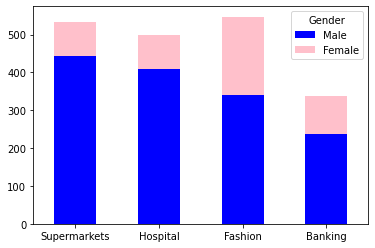

In [291]:
total.T.plot.bar(stacked=True,rot=0, color= ['blue','pink'])

# Business Question 2: what are the nationality distribution of people holding signifacnt control in four major sector namely Agriculture, Beverages, Construction, Media in UK based companies?

### Business Question 2: Code:

In [294]:
inds = ['agriculture', 'beverages', 'construction', 'media']
#creating 500 searches for each industry 
searches = {}
for ind in inds:
    searches[ind] = []
    for i in range(5):
        searches[ind] += search_for_companies_with_query(ind, 100, i)

In [295]:
ind_num = {}
#searching each industry
for ind in inds:
    ind_num[ind] = []
    #searching each company
    for cmp in searches[ind]:
        cmp_number = cmp['company_number']
        ind_num[ind].append(cmp_number)
    ind_num[ind] = list(set(ind_num[ind]))

In [296]:
def nationality_of_person(list_of_company_numbers):
    list_of_nationalities = []
    for num in list_of_company_numbers:
        ppl = all_persons_in_company(num)
        for person in ppl:
            if 'nationality' in person:
                list_of_nationalities.append(person['nationality'])
    return list_of_nationalities

In [297]:
Agriculture= ind_num['agriculture']
Agriculture = nationality_of_person(Agriculture)

In [299]:
Beverages = ind_num['beverages']
Beverages = nationality_of_person(Beverages)

In [302]:
Construction = ind_num['construction']
Construction = nationality_of_person(Construction)

In [305]:
Media = ind_num['media']
Media = nationality_of_person(Media)

### Business Question 2: Mini-report and visualisation:

Summary :
To improve multicultural work environment in UK based companies  Government of United Kingdom wants to make some amendment in UK companies laws of People with Significant Control (PSC). We took data directly from UK Company house data source directly calling through API of 100 companies for each sector . After making rigorous analyse using python language of  data of nationality distribution of people holding significant control in four major industries namely Beverages, Agriculture, Construction, Media industries of UK from company house data source. As per the law any nationality people can have a significant control position in UK based companies.
While analysing the data set with visualization of people’s nationality we found that there are vast disparity of people’s nationality distribution  among all these industries. Majorly British people are holding significant control of companies very few people from other countries are holding significant control positions in these companies. Overseas people have the rights of holding significant control in UK based companies but there are many legal requirements to fulfil for holding these positions.

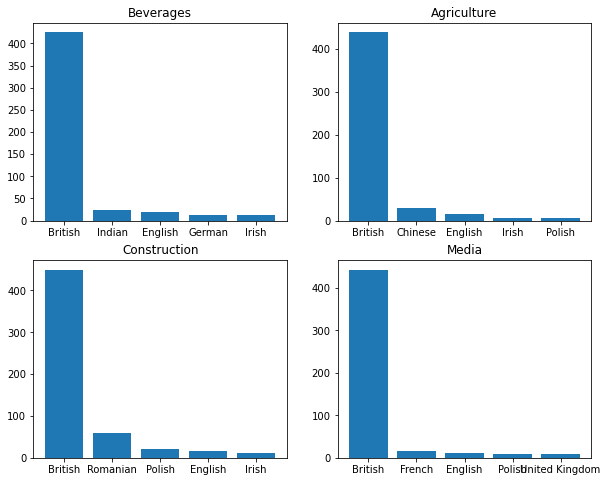

In [311]:
from collections import Counter
nat = Counter(beverages)
new_nat = sorted(nat, key=nat.get, reverse=True)[:4]
nat = [nat[i] for i in new_nat]
inds = ['Beverages','Agriculture','Construction','Media']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs = axs.ravel()
g = 0
for ind in [Beverages, Agriculture, Construction, Media]:
    nat = Counter(ind)
    new_nat = sorted(nat, key=nat.get, reverse=True)[:5]
    nat = [nat[i] for i in new_nat]
    axs[g].bar(new_nat,nat)
    axs[g].set_title(inds[g])
    g += 1

## Business Question 3:  Among these four sector namely as Supermarkets, Hotel, Bank, Hospital which sector have higher Bankruptcy rate?

### Business Question 3: Code:

In [ ]:
inds = ['supermarket', 'hospital', 'bank', 'hotel']
#creating 500 searches for each industry 
searches = {}
for ind in inds:
    searches[ind] = []
    for i in range(5):
        searches[ind] += search_for_companies_with_query(ind, 100, i)

In [ ]:
ind_num = {}
#searching each industry
for ind in inds:
    ind_num[ind] = []
    #searching each company
    for cmp in searches[ind]:
        cmp_number = cmp['company_number']
        ind_num[ind].append(cmp_number)
    ind_num[ind] = list(set(ind_num[ind]))

In [248]:
def isbankrupt(list_of_company_numbers):
    isbankrupt = []
    for num in list_of_company_numbers:
        data = data_for_company(num)
        if 'has_insolvency_history' in data:
            isbankrupt.append(data['has_insolvency_history'])
    return isbankrupt

In [ ]:
hotels = ind_num['hotel']
hotel_bankruptcy = isbankrupt(hotels)

In [241]:
sups = ind_num['bank']
sups_bankruptcy = isbankrupt(bank)

In [253]:
bank = ind_num['bank']
bank_bankruptcy = isbankrupt(bank)

In [256]:
hospital = ind_num['hospital']
hospital_bankruptcy = isbankrupt(hospital)

### Business Question 3: Mini-report and visualisation:

Summary ;
Investors in UK are looking to invest in different industries during uncertain covid times. 
We took data directly from UK Company house data source directly calling through API of 100 companies for each sector. After making rigorous analyse using python language of  data of bankrupted status of companies in UK company house of four major different sectors Supermarkets, Hotel, Bank, Hospital. While looking at data visualisation using pie chart of four different sectors Supermarkets, Hotel, Bank, Hospital and of all these sectors we found that mainly Bank and  Supermarkets are bankrupted higher than other two. Supermarkets and Bank industries are nearly 7.7%  equally bankrupted while hotels have 4.2% and hospitals have 3.6% bankruptcy. So as per data suggested for investors it is good to invest in lower bankrupted industries of Supermarkets and Bank in respect of higher bankrupted companies.

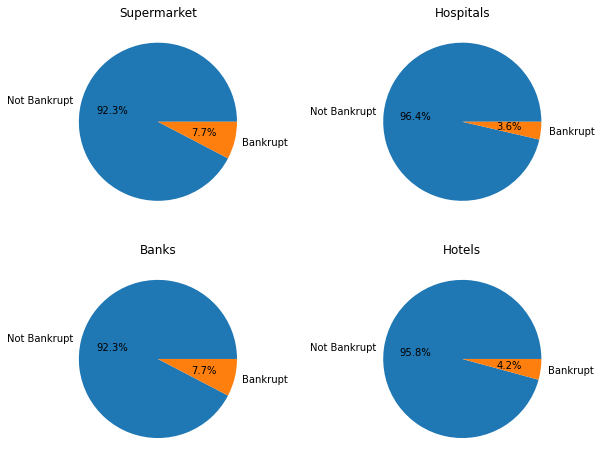

In [257]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs = axs.ravel()
g = 0
for ind in [sups_bankruptcy, hospital_bankruptcy, bank_bankruptcy, hotel_bankruptcy]:
    bankrupt = Counter(ind)
    axs[g].pie(bankrupt.values(),labels = ['Not Bankrupt','Bankrupt'],autopct='%1.1f%%')
    axs[g].set_title(inds[g])
    g += 1